In [1]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plot_search_results import (
    plot_hypervolumes_set,
    plot_pareto_front,
    plot_pareto_front3D,
    plot_1D_obj_scatter,
    plot_1D_obj_confidence_interval,
    plot_2D_obj_confidence_interval,
    plot_obj_progression_set
)
from run_seed_comparisons import run_seed_results_comparisons

plt.style.use('/Users/kdreyer/Documents/Github/GraphGA/paper.mplstyle.py')
orange_ = [i/255 for i in [230, 159, 0]]
sky_blue = [i/255 for i in [86, 180, 233]]
pink_ = [i/255 for i in [204, 121, 167]]
bluish_green = [i/255 for i in [0, 158, 115]]
vermillion = [i/255 for i in [213, 94, 0]]
yellow_ = [i/255 for i in [240, 228, 66]]
blue_ = [i/255 for i in [0, 114, 178]]
colors = [orange_, sky_blue, pink_, bluish_green, vermillion, yellow_, blue_]

grey_ = [(i/255) for i in [150, 150, 150]]
# grey_2 = [(i/255) for i in [127, 127, 127]]
grey_2 = [(i/255) for i in [100, 100, 100]]
grey_3 = [(i/255) for i in [50, 50, 50]]



## Figure 2: Amplifier

### (b) Single cell model GA ON_rel progression 

In [2]:
path_amplifier_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_single_cell/Original_hyperparams_vary_dose/"
results_runs_single = "Amplifier_single_cell_vary_dose_original_hp_seed_"
# run_seed_results_comparisons(path_amplifier_single, results_runs_single, 1, ["ON_rel"], 50)

### (c) Population model GA ON_rel progression

In [3]:
path_amplifier_pop = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/"
results_runs_pop = "Amplifier_pop_vary_dose_original_hp_seed_"
# run_seed_results_comparisons(path_amplifier_pop, results_runs_pop, 1, ["ON_rel"], 50)

### (d) Population model GA search space and CI

In [53]:
def plot_1D_CI_labeled(
        results_path: str,
        figure_path: str,
):
    labeled_CI_circuits = pd.read_csv(results_path+"labeled_CI_circuits.csv")
    labled_CI_circuit_variants = pd.read_csv(results_path+"labeled_CI_circuit_variants.csv")
    opt_objs = labeled_CI_circuits.drop(list(
        labeled_CI_circuits.filter(regex="topology")
        ), axis=1)
    opt_objs = opt_objs.drop(list(
        labeled_CI_circuits.filter(regex="doses")
        ), axis=1)
    opt_objs = opt_objs.drop(list(
        labeled_CI_circuits.filter(regex="Unnamed: 0")
        ), axis=1)
    # display(opt_objs)
    # display(opt_circuits_df_nonan)
    opt_variant_objs = labled_CI_circuit_variants.drop(list(
        labled_CI_circuit_variants.filter(regex="topology")
        ), axis=1)
    opt_variant_objs = opt_variant_objs.drop(list(
        labled_CI_circuit_variants.filter(regex="doses")
        ), axis=1)
    opt_variant_objs = opt_variant_objs.drop(list(
        labled_CI_circuit_variants.filter(regex="Unnamed: 0")
        ), axis=1)
    # display(opt_variant_objs)
    opt_objs_T = opt_objs.transpose()
    opt_objs_T["opt_topo"] = opt_objs_T.index
    # display(opt_objs_T)
    opt_variant_objs_T = opt_variant_objs.transpose()
    opt_variant_objs_T["opt_topo"] = opt_variant_objs_T.index

    opt_objs_plot = pd.melt(frame=opt_objs_T,
                            id_vars="opt_topo",
                            var_name="column_name",
                            value_name="ON_rel")
    opt_objs_plot.dropna(inplace=True)
    opt_variant_objs_plot = pd.melt(frame=opt_variant_objs_T,
                            id_vars="opt_topo",
                            var_name="column_name",
                            value_name="ON_rel")
    opt_variant_objs_plot.dropna(inplace=True)
    x_vals = [0]*len(opt_objs_plot)
    # print(len(x_vals))
    np.random.seed(0)
    jittered_x = x_vals + np.random.rand(
        len(x_vals))
    opt_objs_plot["jittered_x"] = jittered_x

    x_vals_var = [0]*len(opt_variant_objs_plot)
    jittered_x_var = x_vals_var + np.random.rand(
        len(x_vals_var))
    opt_variant_objs_plot["jittered_x"] = jittered_x_var

    fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))
    sns.scatterplot(data= opt_objs_plot, x="jittered_x", y="ON_rel", ax=ax, hue="opt_topo", palette=colors, s=10, legend=False)
    sns.scatterplot(data= opt_variant_objs_plot, x="jittered_x", y="ON_rel", ax=ax, hue="opt_topo", palette=[colors[2], colors[5]], marker= "X", s=15, legend=False)
    lower_bound = [63.11786016]*len(opt_objs_plot)
    upper_bound = [63.50911412131601]*len(opt_objs_plot)
    jittered_x.sort()
    ax.fill_between(jittered_x, lower_bound, upper_bound, alpha=0.2, color="grey", linewidth=0.1, zorder=3)
    ax.set_xticks([])
    ax.set_yticks([63.1, 63.2, 63.3, 63.4, 63.5])
    ax.set_ylim(bottom=63.1)
    ax.set_xlabel("")
    # plt.show()
    plt.savefig(results_path+"labeled_circuits_in_CI.svg", bbox_inches="tight")


In [ ]:
path = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_pop/Original_hyperparams_vary_dose/Amplifier_pop_vary_dose_original_hp_seed_0/"
results_analysis = "2024-08-23_results_analysis_full_CI/"

plot_1D_CI_labeled(path+results_analysis, "")

In [ ]:
# path_amp_pop_results = path_amplifier_pop + "Amplifier_pop_vary_dose_original_hp_seed_0/"
# path_Z_sampling = "2024-04-24_Amplifier_pop_vary_dose_Z_matrix_sampling/"
# Z_CI_fname= "Z_matrix_sampling_for_CI.pkl"
# CI_Z_sampling = pd.read_pickle(path_amp_pop_results+path_Z_sampling+Z_CI_fname)
# # display(CI_Z_sampling)
# ON_rel_max = 63.50911412131601
# CI_stderr = max(CI_Z_sampling["ON_rel_std_error"])
# CI_plus = 63.50911412131601 + CI_stderr
# CI_minus = 63.50911412131601 - CI_stderr
# CI_range = CI_plus - CI_minus
# print(CI_plus, CI_minus)

# plot_1D_obj_confidence_interval(path_amp_pop_results, path_amp_pop_results+path_Z_sampling+"CI_zoomed_paper.svg", CI_stderr, ["ON_rel"])#, y_lim_bottom=0.0)

### (f) experimental data

In [30]:
x_labels = [1, 2, 3, 4]
ON_rel_design = [62.706, 63.304, 36.275, 35.727]
ON_rel_test = [18.263, 18.475, 10.604, 10.523]
ON_rel_exp = [2.943, 2.456, 7.522, 6.928]
ON_rel_exp_stderr = [0.459, 0.383, 1.182, 1.301]

In [ ]:
experimental_data_path = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Experimental_data_&_planning/"
fig, ax = plt.subplots(1, 1, figsize=(2.25, 1.75), sharex=True, sharey=True)
xticks = []
for i in range(len(ON_rel_design)):
    ax.bar(i-0.25, ON_rel_design[i], color=grey_, width=0.225, align="center", label="design")
    ax.bar(i, ON_rel_test[i], color=grey_2, width=0.225, align="center", label="test")
    ax.bar(i+0.25, ON_rel_exp[i], color=grey_3, width=0.225, align="center", label="exp")
    (_, caps1, _) = ax.errorbar(i+0.25, ON_rel_exp[i], ON_rel_exp_stderr[i], color="k", capsize=1.5, elinewidth=0.5)
    for cap in caps1:
        cap.set_markeredgewidth(0.5)

    xticks.append(i)
ax.set_xticks(xticks)
ax.set_xticklabels(["1", "2", "3", "4"])
ax.set_xlabel("Amplifier topology")
ax.set_ylabel("ON_rel")
# plt.legend()
# plt.show()
# plt.savefig(experimental_data_path+"amplifier_experiment.svg")

## Figure 3: Signal conditioner

### (b) original hyperparameter pareto front

In [ ]:
path_sigcond_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Original_hyperparams/run4_ngen120/"
selected_seed_single = "2024-10-04_Signal_cond_single_DsRED_original_hps_ngen120_seed_5/"
pareto_obj_df = pd.read_pickle(path_sigcond_single+selected_seed_single+"final_objectives_df.pkl")
# plot_pareto_front(path_sigcond_single+selected_seed_single+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (b) original hyperparameter hypervolume set

In [ ]:
path_sigcond_single = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Original_hyperparams/run4_ngen120/"
results_runs_single = "2024-10-04_Signal_cond_single_DsRED_original_hps_ngen120_seed_"
# run_seed_results_comparisons(path_sigcond_single, results_runs_single, 2, ["ON_rel", "FI_rel"], 120, 5)

### (d) optimized hyperparameter pareto front

In [ ]:
path_sigcond_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Optimized_hyperparams_fixed_pop_max_hv/run4_ngen120/"
selected_seed_single_opt = "2024-10-04_Signal_cond_single_DsRED_opt_hps_run4_seed_3/"
pareto_obj_df = pd.read_pickle(path_sigcond_single_opt+selected_seed_single_opt+"final_objectives_df.pkl")
# plot_pareto_front(path_sigcond_single_opt+selected_seed_single_opt+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (d) optimized hyperparameter hypervolume set

In [ ]:
path_sigcond_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_single_cell/synTF-R-DsR/Optimized_hyperparams_fixed_pop_max_hv/run4_ngen120/"
results_runs_single_opt = "2024-10-04_Signal_cond_single_DsRED_opt_hps_run4_seed_"
# run_seed_results_comparisons(path_sigcond_single_opt, results_runs_single_opt, 2, ["ON_rel", "FI_rel"], 120, 3)

## Supplementary Figure XX: signal conditioner population model

### (a) single cell opt params pareto front

In [ ]:
path_sigcond_pop_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_pop/synTF-R-DsR/Single_cell_model_opt_hyperparams_max_hv/run5_ngen130/"
selected_seed_pop_opt = "2024-10-04_Signal_cond_pop_DsRED_single_opt_hp_run5_seed_2/"
pareto_obj_df = pd.read_pickle(path_sigcond_pop_opt+selected_seed_pop_opt+"final_objectives_df.pkl")
# plot_pareto_front(path_sigcond_pop_opt+selected_seed_pop_opt+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (b) single cell opt params hypervolume set

In [ ]:
path_sigcond_pop_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Signal_conditioner_pop/synTF-R-DsR/Single_cell_model_opt_hyperparams_max_hv/run5_ngen130/"
results_runs_pop_opt = "2024-10-04_Signal_cond_pop_DsRED_single_opt_hp_run5_seed_"
# run_seed_results_comparisons(path_sigcond_pop_opt, results_runs_pop_opt, 2, ["ON_rel", "FI_rel"], 130, 2)

## Figure 4 Pulse generator

### (b) optimized hyperparameter pareto front

In [ ]:
path_pulse_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse/Optimized_hyperparams_fixed_pop_max_hv/"
selected_seed_single_opt = "2024-10-09_Pulse_single_DsRED_t_pulse_opt_hps_ngen80_seed_/"
pareto_obj_df = pd.read_pickle(path_sigcond_single_opt+selected_seed_single_opt+"final_objectives_df.pkl")
# plot_pareto_front(path_sigcond_single_opt+selected_seed_single_opt+"pareto_front_paper.svg", pareto_obj_df, ["ON_rel", "FI_rel"], False)

### (b) optimized hyperparameter hypervolume set

In [ ]:
path_pulse_single_opt = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Pulse_single_cell/Optimized_hyperparams/t_pulse/Optimized_hyperparams_fixed_pop_max_hv/"
results_runs_single_opt = "2024-10-09_Pulse_single_DsRED_t_pulse_opt_hps_ngen80_seed_"
run_seed_results_comparisons(path_pulse_single_opt, results_runs_single_opt, 2, ["t_pulse", "prominence_rel"], 80, 3)

FileNotFoundError: [Errno 2] No such file or directory: '2024-10-09_Pulse_single_DsRED_t_pulse_opt_hps_ngen80_seed_0/final_population.pkl'

### ZF1 and 2 only

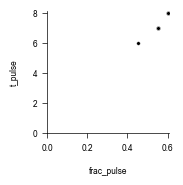

In [2]:
path_Z12 = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/2024-10-10_Pulse_pop_DsRED_t_pulse_frac_pulse_original_hps_Z1_Z2_ngen50_seed_0/"
pareto_obj_df = pd.read_pickle(path_Z12+"final_objectives_df.pkl")
plot_pareto_front(path_Z12+"pareto_front_paper.svg", pareto_obj_df, ["frac_pulse", "t_pulse"], False)

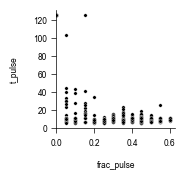

In [4]:
path_Z12 = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/2024-10-10_Pulse_pop_DsRED_t_pulse_frac_pulse_original_hps_Z1_Z2_ngen50_seed_0/"
unique_obj_df = pd.read_pickle(path_Z12+"unique_objectives_df.pkl")
plot_pareto_front(path_Z12+"unique_obj_scatter_plot.svg", unique_obj_df, ["frac_pulse", "t_pulse"], False)